## Import Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.model_selection as ms
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.graphics.regressionplots import *
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn import neighbors
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [21]:
#import df for linear models
train_dum_df = pd.read_csv('./Data/train_dum_df.csv', index_col=0)
test_dum_df = pd.read_csv('./Data/test_dum_df.csv', index_col=0)

## Pre-Processing for Linear Models

In [22]:
#assign predictor and target variables
y = train_dum_df['SalePrice'].apply(np.log)
X = train_dum_df.drop(["SalePrice"], axis = 1)

In [23]:
#train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
r2_scores = pd.DataFrame(columns=('Model', 'Score'))

##    Multiple Linear Regression

In [25]:
lr = LinearRegression()

lr.fit(X_train, y_train)
cv = np.mean(cross_val_score(lr, X_train, y_train, cv = 10))
pred = lr.predict(X_test)
RMSE = (mean_squared_error(pred, y_test, squared = False))

print("R^2 train set: %f" %lr.score(X_train, y_train))
print("R^2 test  set: %f" %lr.score(X_test, y_test))
print("CV R^2 train set: " + str(round(cv,5)))
print("RMSE: " + str(round(RMSE, 5))) 

R^2 train set: 0.910181
R^2 test  set: 0.882335
CV R^2 train set: 0.84205
RMSE: 0.14128


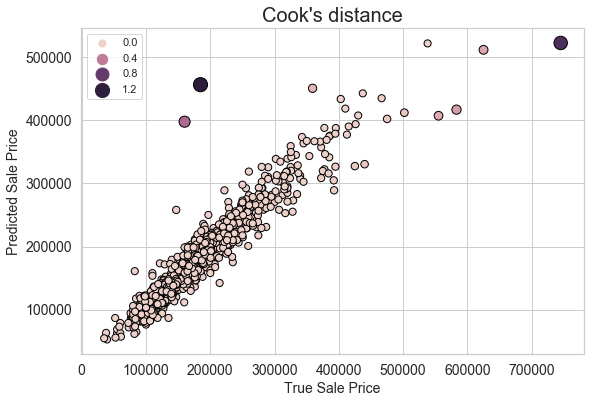

In [26]:
pred1 = lr.predict(X_train)
model = smf.ols('np.exp(y_train) ~ np.exp(pred1)', data=X_train).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(x = np.exp(y_train), y = np.exp(pred1), hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('True Sale Price', fontsize=14)
plt.ylabel('Predicted Sale Price', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);

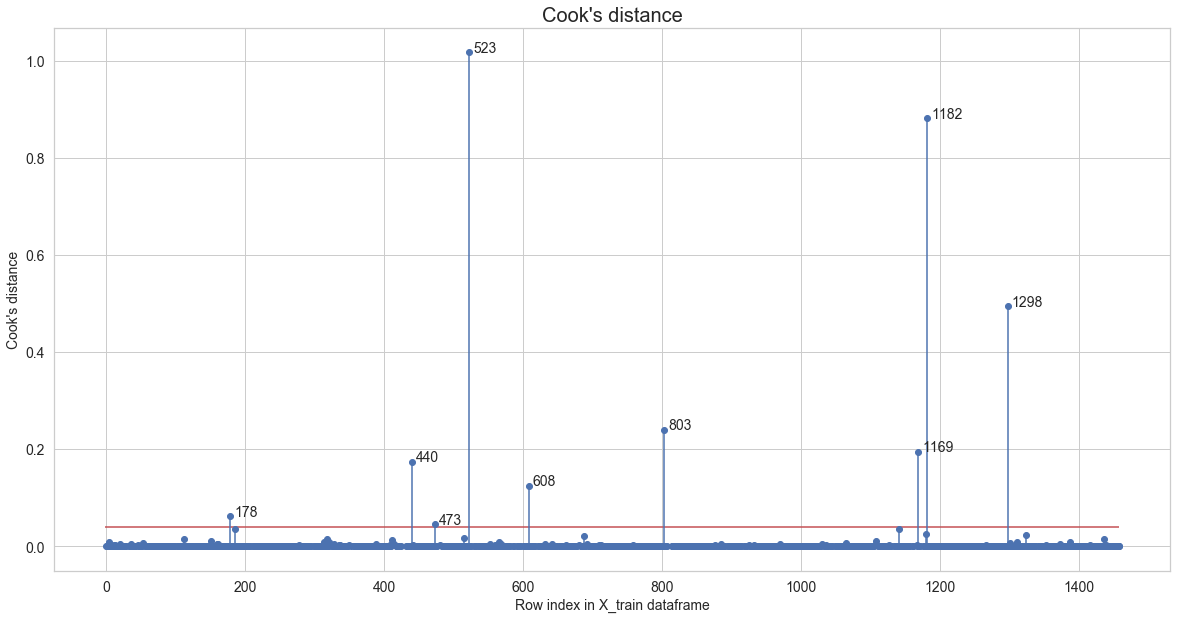

In [27]:
threshold = 4/100 # can change this
plt.figure(figsize=(20,10))
# stem plot - the x-axis represents the index of the observation and the y-axis its Cook's distance
plt.stem(distance.index, distance.values, basefmt=" ")

# horizontal line showing the threshold value
plt.hlines(threshold, -2, 1459, 'r')

# the observations with Cook's distances higher than the threshold value are labeled in the plot
influencial_data = distance[distance > threshold]

for index, value in influencial_data.items():
    plt.text(index + 6, value, str(index), fontsize=14)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Row index in X_train dataframe', fontsize=14)
plt.ylabel('Cook\'s distance', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);

In [28]:
# identify rows in X_train df that are influential outliers
X_train.loc[influencial_data.index,:]

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage,LotArea,OverallQual,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageFinish,GarageCars,GarageQual,Total_OutdoorSF,Baths,Age,AgeRemodAdd,AgeGarage
1182,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,160.0,15623,10,0.0,4,5,2396,5,1,4476,5,10,3,3,3,3,249,5,11,11,11.0
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.0,17423,9,748.0,5,5,2216,5,1,2234,5,9,4,3,3,3,60,3,1,0,0.0
523,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

## Remove influential outliers and refit model

In [29]:
X_train_drop = X_train.drop(influencial_data.index, axis=0)
y_train_drop = y_train.drop(influencial_data.index, axis=0)

In [30]:
## original model
lr = LinearRegression()

lr.fit(X_train, y_train)
cv = np.mean(cross_val_score(lr, X_train, y_train, cv = 10))
pred = lr.predict(X_test)
RMSE = (mean_squared_error(pred, y_test, squared = False))

print("R^2 train set: %f" %lr.score(X_train, y_train))
print("R^2 test  set: %f" %lr.score(X_test, y_test))
print("CV R^2 train set: " + str(round(cv,5)))
print("RMSE: " + str(round(RMSE, 5))) 

R^2 train set: 0.910181
R^2 test  set: 0.882335
CV R^2 train set: 0.84205
RMSE: 0.14128


## refit model with influential outliers removed

In [31]:
# using original threshold for influential outliers : 4/100, 
# gives the best values for the metrics
lr = LinearRegression()

lr.fit(X_train_drop, y_train_drop)
cv = np.mean(cross_val_score(lr, X_train_drop, y_train_drop, cv = 10))
pred = lr.predict(X_test)
RMSE = (mean_squared_error(pred, y_test, squared = False))

print("R^2 train set: %f" %lr.score(X_train, y_train))
print("R^2 test  set: %f" %lr.score(X_test, y_test))
print("CV R^2 train set: " + str(round(cv,5)))
print("RMSE: " + str(round(RMSE, 5))) 

R^2 train set: 0.886211
R^2 test  set: 0.889927
CV R^2 train set: 0.88269
RMSE: 0.13665


In [32]:
r2_scores.loc[0] = 'MLR', round(lr.score(X_train, y_train), 2)

In [33]:
# calculate VIF for each feature 
VIF = pd.DataFrame() 
VIF["Features"] = X.columns 
VIF["VIF"] = [round(variance_inflation_factor(X.values, i),3)
                          for i in range(len(X.columns))] 
  
VIF.sort_values(by='VIF', ascending=False)

,Features,VIF
79,Exterior1st_CBlock,inf
9,MSSubClass_90,inf
61,BldgType_Duplex,inf
93,Exterior2nd_CBlock,inf
118,GarageType_NA,inf
121,GarageCond_None,inf
123,GarageCond_TA,484.687
152,GarageQual,236.568
16,MSZoning_RL,190.387
113,GarageType_Attchd,163.565


## LASSO Model

In [34]:
lasso = Lasso(normalize = True, max_iter = 10000)

In [35]:
alpha_100 = np.logspace(-7,-1, 100)
coef = []
for i in alpha_100:
    lasso.set_params(alpha = i)
    lasso.fit(X, y)
    coef.append(lasso.coef_)

Text(0, 0.5, 'coefficients')

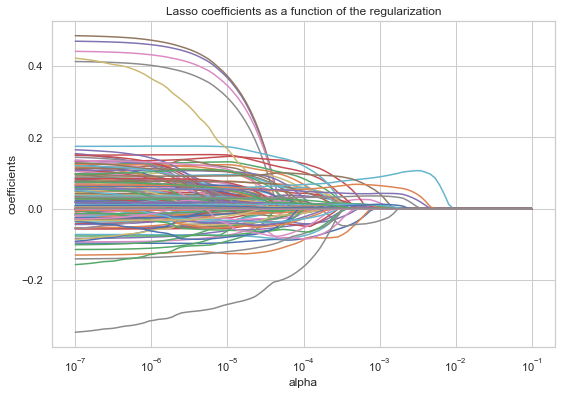

In [36]:
df_coef = pd.DataFrame(coef, index=alpha_100)
title = 'Lasso coefficients as a function of the regularization'
axes = df_coef.plot(logx = True, title=title, legend = False)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')

In [37]:
lassocv = LassoCV(alphas = alpha_100, normalize = True, cv = 10, max_iter = 10000)

In [38]:
lassocv.fit(X_train, y_train)
alpha_lasso = lassocv.alpha_

y_train_predicted = lassocv.predict(X_train)
RMSE_train = np.sqrt(mean_squared_error(y_train,y_train_predicted))

y_test_predicted = lassocv.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_predicted))

print("Best Lambda: " + str(alpha_lasso))
print("R^2 train set: %f" %lassocv.score(X_train, y_train))
print("R^2 test set: %f" %lassocv.score(X_test, y_test))
print('RMSE for train data is: %.3f' % RMSE_train)
print('RMSE for test data is: %.3f' % RMSE_test)



Best Lambda: 0.00014174741629268049
R^2 train set: 0.892270
R^2 test set: 0.881130
RMSE for train data is: 0.129
RMSE for test data is: 0.142


In [39]:
lassocv_coef = pd.DataFrame(lassocv.coef_, index = X.columns).rename(columns = {0:"Coef."})
lassocv_imp = lassocv_coef[lassocv_coef["Coef."] > 0]
lassocv_imp = lassocv_coef.reindex(lassocv_coef["Coef."].abs().sort_values(ascending = False).index)
lassocv_imp.head(10)

,Coef.
Exterior1st_BrkComm,-0.187989
Neighborhood_StoneBr,0.125988
Neighborhood_Crawfor,0.117401
MSSubClass_30,-0.106239
CentralAir,0.098440
Neighborhood_NridgHt,0.092029
GarageCond_Po,0.088922
Neighborhood_NoRidge,0.085297
Exterior1st_BrkFace,0.084642
LotShape_IR3,-0.080876


## Feature Selection and Refitting MLR

In [40]:
imp_cols = lassocv_coef[lassocv_coef["Coef."] != 0].index.tolist()
print("Shape of Data set with only important features: " + str(X[imp_cols].shape))

Shape of Data set with only important features: (1460, 66)


In [41]:
lasso3 = Lasso()
lasso3.fit(X_train[imp_cols], y_train)
#alpha_lasso3 = lasso3.alpha_

y_train_predicted = lasso3.predict(X_train[imp_cols])
RMSE_train = np.sqrt(mean_squared_error(y_train,y_train_predicted))

y_test_predicted = lasso3.predict(X_test[imp_cols])
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_predicted))

#print("Best Lambda: " + str(alpha_lasso3))
#print("R^2 train set: %f" %lasso3.score(X_train[imp_cols], y_train))
#print("R^2 test set: %f" %lasso.score(X_test[imp_cols], y_test))
print('RMSE for train data is: %.3f' % RMSE_train)
print('RMSE for test data is: %.3f' % RMSE_test)

RMSE for train data is: 0.207
RMSE for test data is: 0.184


## Same, feature selection and refitting MLR but with influential outliers removed

In [42]:
y_train_drop_predicted = lassocv.predict(X_train_drop)

lasso3 = Lasso()
lasso3.fit(X_train_drop[imp_cols], y_train_drop)
#alpha_lasso3 = lasso3.alpha_

y_train_predicted = lasso3.predict(X_train_drop[imp_cols])
RMSE_train = np.sqrt(mean_squared_error(y_train_drop, y_train_predicted))

y_test_predicted = lasso3.predict(X_test[imp_cols])
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_predicted))

#print("Best Lambda: " + str(alpha_lasso3))
print("R^2 train set: %f" %lasso3.score(X_train_drop[imp_cols], y_train_drop))
print("R^2 test set: %f" %lasso3.score(X_test[imp_cols], y_test))
print('RMSE for train data is: %.3f' % RMSE_train)
print('RMSE for test data is: %.3f' % RMSE_test)

R^2 train set: 0.786538
R^2 test set: 0.813613
RMSE for train data is: 0.177
RMSE for test data is: 0.178


In [43]:
y_train_drop_predicted = lassocv.predict(X_train_drop)

lr8 = LinearRegression()

lr8.fit(X_train_drop[imp_cols], y_train_drop)
#alpha_lasso3 = lasso3.alpha_

y_train_predicted = lr8.predict(X_train_drop[imp_cols])
RMSE_train = np.sqrt(mean_squared_error(y_train_drop, y_train_predicted))

y_test_predicted = lr8.predict(X_test[imp_cols])
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_predicted))

#print("Best Lambda: " + str(alpha_lasso3))
print("R^2 train set: %f" %lr8.score(X_train_drop[imp_cols], y_train_drop))
print("R^2 test set: %f" %lr8.score(X_test[imp_cols], y_test))
print('RMSE for train data is: %.3f' % RMSE_train)
print('RMSE for test data is: %.3f' % RMSE_test)

R^2 train set: 0.919379
R^2 test set: 0.888399
RMSE for train data is: 0.109
RMSE for test data is: 0.138


In [44]:
r2_scores.loc[1] = 'Lasso', round(lr.score(X_train, y_train), 2)

### error of Linear Model improved following feature selection based on Lasso, removal of influential outliers based on Cook's distance and refitting to LM

## VIF following feature selection and refitting MLR but with influential outliers removed

In [45]:
# calculate VIF for each feature 
VIF = pd.DataFrame() 
VIF["Features"] = X_train_drop[imp_cols].columns 
VIF["VIF"] = [round(variance_inflation_factor(X_train_drop[imp_cols].values, i),3)
                          for i in range(len(X_train_drop[imp_cols].columns))] 
  
VIF.sort_values(by='VIF', ascending=False)

,Features,VIF
24,BldgType_Duplex,inf
2,MSSubClass_90,inf
50,ExterQual,100.974
49,OverallQual,82.564
56,KitchenQual,81.406
55,GrLivArea,75.470
57,TotRmsAbvGrd,69.911
51,BsmtQual,46.709
53,HeatingQC,36.447
61,GarageQual,34.850


## Tree-Based Models Pre-Processing

In [46]:
#import df
train_undum_df = pd.read_csv('./Data/train_undum_df.csv', index_col=0)
test_undum_df = pd.read_csv('./Data/test_undum_df.csv', index_col=0)

In [47]:
#assign predictor and target variables
y = train_undum_df['SalePrice'].apply(np.log)
X = train_undum_df.drop(["SalePrice"], axis = 1)

In [48]:
#train/test split 
Xu_train, Xu_test, yu_train, yu_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Random Forest 

In [49]:
# best parameters with lowered max_depth
rf2 = RandomForestRegressor(bootstrap= False,
                    ccp_alpha= 0.0,
                    criterion= 'mse',
                    max_depth= 6,
                    max_features= 8,
                    max_leaf_nodes= None,
                    max_samples= None,
                    min_samples_leaf= 1,
                    min_samples_split= 2,
                    n_estimators= 500,
                    random_state= 42)

rf2.fit(Xu_train, yu_train)

RandomForestRegressor(bootstrap=False, max_depth=6, max_features=8,
                      n_estimators=500, random_state=42)

In [52]:
#Baseline Values
train_baseline_rf2 = rf2.predict(Xu_train)
RMSE_train2 = np.sqrt(mean_squared_error(yu_train, train_baseline_rf2))

test_baseline_rf2 = rf2.predict(Xu_test)
RMSE_test2 = np.sqrt(mean_squared_error(yu_test,test_baseline_rf2))

print("Baseline Values: ")
print("R^2 for train data is: %.3f" %(rf2.score(Xu_train, yu_train)))
print("R^2 for test data is: %.3f" %(rf2.score(Xu_test,yu_test)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train2)
print("RMSE for test data is: %.3f" % RMSE_test2)

Baseline Values: 
R^2 for train data is: 0.932
R^2 for test data is: 0.886
--------------------------------------------------
RMSE for train data is: 0.105
RMSE for test data is: 0.133


In [53]:
r2_scores.loc[2] = 'RF', round(rf2.score(Xu_train, yu_train), 2)

## Gradient Boosting

In [54]:
gbm = GradientBoostingRegressor()
gbm.fit(Xu_train, yu_train)

GradientBoostingRegressor()

In [55]:
#manually lowered max depth 
gbm2 = GradientBoostingRegressor(n_estimators=700,
                                 learning_rate=0.01,
                                 max_depth=2,
                                 max_features=9)

gbm2.fit(Xu_train, yu_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, max_features=9,
                          n_estimators=700)

In [56]:
train_baseline_gbm2 = gbm2.predict(Xu_train)
RMSE_train2 = np.sqrt(mean_squared_error(yu_train, train_baseline_gbm2))

test_baseline_gbm2 = gbm2.predict(Xu_test)
RMSE_test2 = np.sqrt(mean_squared_error(yu_test,test_baseline_gbm2))

print("Final Values: ")
print("R^2 for train data is: %.3f" %(gbm2.score(Xu_train, yu_train)))
print("R^2 for test data is: %.3f" %(gbm2.score(Xu_test,yu_test)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train2)
print("RMSE for test data is: %.3f" % RMSE_test2)

Final Values: 
R^2 for train data is: 0.915
R^2 for test data is: 0.888
--------------------------------------------------
RMSE for train data is: 0.117
RMSE for test data is: 0.132


In [57]:
r2_scores.loc[3] = 'GB', round(gbm2.score(Xu_train, yu_train), 2)

## XGBOOST 

In [58]:
#manually lowered max depth 
xgb= XGBRegressor(colsample_bytree= 0.6,
                        gamma= 0.055,
                        learning_rate=0.078,
                        max_depth= 4,
                        min_child_weight= 1,
                        n_estimators= 150,
                        random_state=1,
                        reg_alpha= 0,
                        subsample= 0.3)
xgb.fit(Xu_train, yu_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.055, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.078, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
train_baseline_xgb = xgb.predict(Xu_train)
RMSE_train2 = np.sqrt(mean_squared_error(yu_train, train_baseline_xgb))

test_baseline_xgb = xgb.predict(Xu_test)
RMSE_test2 = np.sqrt(mean_squared_error(yu_test,test_baseline_xgb))

print("Final Values: ")
print("R^2 for train data is: %.3f" %(xgb.score(Xu_train, yu_train)))
print("R^2 for test data is: %.3f" %(xgb.score(Xu_test,yu_test)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train2)
print("RMSE for test data is: %.3f" % RMSE_test2)

Final Values: 
R^2 for train data is: 0.945
R^2 for test data is: 0.884
--------------------------------------------------
RMSE for train data is: 0.094
RMSE for test data is: 0.134


In [60]:
r2_scores.loc[4] = 'XGB', round(xgb.score(Xu_train, yu_train), 2)

## Comparing Models

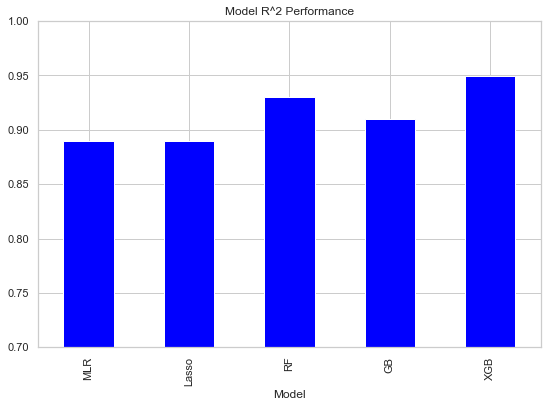

In [76]:
r2_scores.plot.bar(x = 'Model', y ='Score', color = 'blue',legend=None)
plt.title('Model R^2 Performance')
plt.ylim(.7,1)
r2_scores

#plt.savefig("r2_scores.png")

,Model,Score
0,MLR,0.89
1,Lasso,0.89
2,RF,0.93
3,GB,0.91
4,XGB,0.95


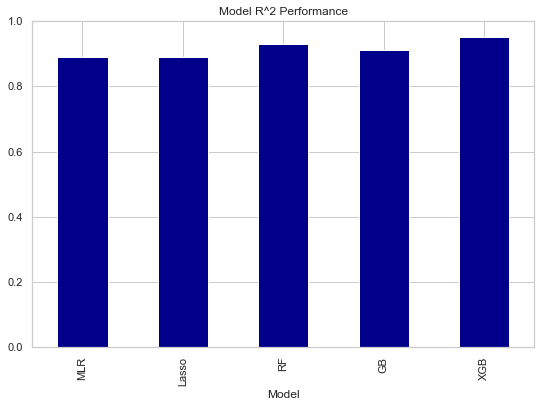

In [74]:
r2_scores.plot.bar(x = 'Model', y ='Score', color = 'darkblue',legend=None)
plt.title('Model R^2 Performance')
plt.ylim(0,1)
r2_scores